In [5]:
import pandas as pd 
import numpy as np
iris_data = pd.read_csv('data/iris_data.csv', decimal=',')
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [6]:
iris_data.drop(['Petal length','Petal width'],'columns',inplace=True)

In [11]:
# Round to 1
iris_data.round({'Sepal length': 1, 'Sepal width': 1})

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [12]:
# Round to 0
iris_data.round(0)

,Sepal length,Sepal width,Species
0,5.0,4.0,I. setosa
1,5.0,3.0,I. setosa
2,5.0,3.0,I. setosa
3,5.0,3.0,I. setosa
4,5.0,4.0,I. setosa
...,...,...,...
145,7.0,3.0,I. virginica
146,6.0,2.0,I. virginica
147,6.0,3.0,I. virginica
148,6.0,3.0,I. virginica


In [13]:
iris_data.head()

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa


In [15]:
setosaSet = (iris_data.loc[(iris_data['Species'] == 'I. setosa')]).reset_index()

In [18]:
setosaSet.head()

,index,Sepal length,Sepal width,Species
0,0,5.1,3.5,I. setosa
1,1,4.9,3.0,I. setosa
2,2,4.7,3.2,I. setosa
3,3,4.6,3.1,I. setosa
4,4,5.0,3.6,I. setosa


In [19]:
virginicaSet = (iris_data.loc[(iris_data['Species'] == 'I. virginica')]).reset_index()

In [20]:
virginicaSet.head()

,index,Sepal length,Sepal width,Species
0,100,6.3,3.3,I. virginica
1,101,5.8,2.7,I. virginica
2,102,7.1,3.0,I. virginica
3,103,6.3,2.9,I. virginica
4,104,6.5,3.0,I. virginica


In [21]:
versicolorSet = (iris_data.loc[(iris_data['Species'] == 'I. versicolor')]).reset_index()

In [22]:
versicolorSet.head()

,index,Sepal length,Sepal width,Species
0,50,7.0,3.2,I. versicolor
1,51,6.4,3.2,I. versicolor
2,52,6.9,3.1,I. versicolor
3,53,5.5,2.3,I. versicolor
4,54,6.5,2.8,I. versicolor


In [23]:
%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth

Populating the interactive namespace from numpy and matplotlib


In [24]:
def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [36]:
versicolorSimple = versicolorSet[["Sepal length", "Sepal width"]]

In [37]:
versicolorSimple

,Sepal length,Sepal width
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
5,5.7,2.8
6,6.3,3.3
7,4.9,2.4
8,6.6,2.9
9,5.2,2.7


In [38]:
bandwidth = estimate_bandwidth(versicolorSimple, quantile=0.2)

In [39]:
bandwidth

0.38288774358852407

In [44]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [45]:
ms

MeanShift(bandwidth=0.38288774358852407, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [46]:
 ms.fit(versicolorSimple)

MeanShift(bandwidth=0.38288774358852407, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [47]:
labels = ms.labels_

In [48]:
labels

array([1, 1, 1, 3, 1, 0, 1, 3, 1, 3, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0])

In [49]:
labels_unique = np.unique(labels)

In [50]:
labels_unique

array([0, 1, 2, 3])

In [51]:
n_clusters = len(labels_unique)

In [52]:
n_clusters

4

In [77]:
# All flowers
data = iris_data[["Sepal length", "Sepal width"]]

In [78]:
data

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [80]:
nympy_data = data.to_numpy()

In [81]:
nympy_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [82]:
# All flowers
labels, cluster_centers, n_clusters = mean_shift(nympy_data)

Number of estimated clusters : 3


In [83]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
cluster_centers

array([[6.08727273, 2.90181818],
       [5.        , 3.37692308],
       [7.6       , 3.73333333]])

In [85]:
n_clusters

3

In [86]:
%matplotlib notebook
# 2D data generated and meanshift used to find labels, cluster centers and amount of clusters
from itertools import cycle
from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>


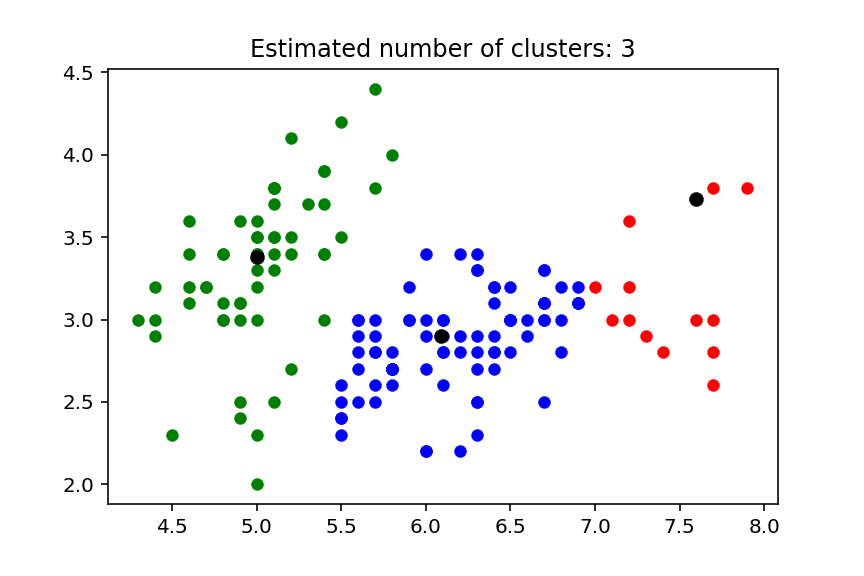

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True False False False
  True False  True  True  True  True  True  True  True False False  True
  True  True False  True  True False  True  True  True False False False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[6.08727273 2.90181818]
[6.4 6.9 5.5 6.5 5.7 6.3 6.6 5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [92]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = nympy_data[my_members,0], nympy_data[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

In [96]:
# quantile 1.5
def mean_shift_quatile(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.15, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [97]:
labels, cluster_centers, n_clusters = mean_shift_quatile(nympy_data)

Number of estimated clusters : 6


<IPython.core.display.Javascript object>


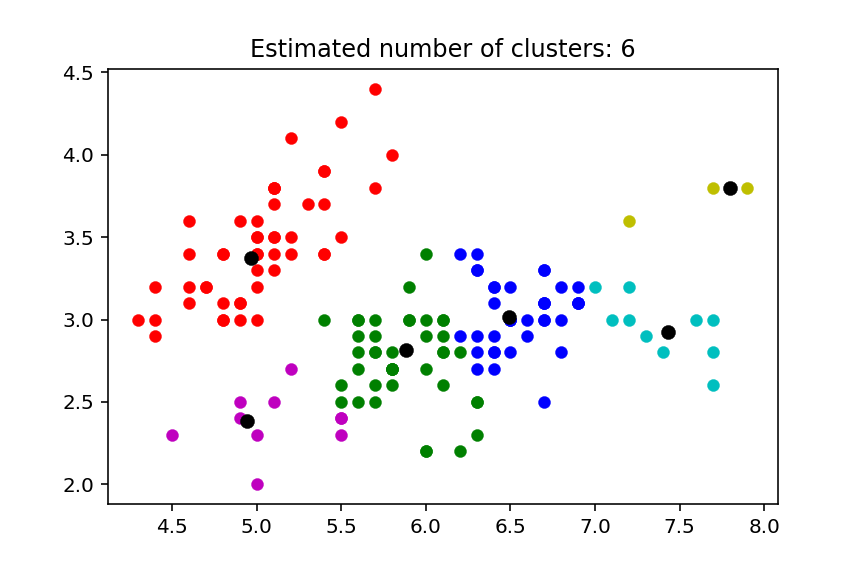

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False  True False  True False
 False False False False False  True False False False False False False
 False False  True  True  True  True False False False False False False
 False False  True False False False False False False False False False
 False  True False False  True False False  True  True False False False
  True False  True  True  True False False  True  True False False False
  True False False  True  True False False False  True False False False
  True  True False False  True  True False  True  True  True False  True
  True  True False  True  True False]
[6.4902439  3.01463415]
[6.4 6.9 6.5 6.3 6.6 6.7 6.4 6.6 6.8 6.7 6.7 6.2 6.3 6.3 6.5 6

Text(0.5, 1.0, 'Estimated number of clusters: 6')

In [98]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = nympy_data[my_members,0], nympy_data[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

In [99]:
# Normal plot

In [102]:
normalData = data.to_numpy()

In [103]:
normalData

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [106]:
def mean_shift_normal(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [107]:
labels, cluster_centers, n_clusters = mean_shift_normal(normalData)

Number of estimated clusters : 2


<IPython.core.display.Javascript object>


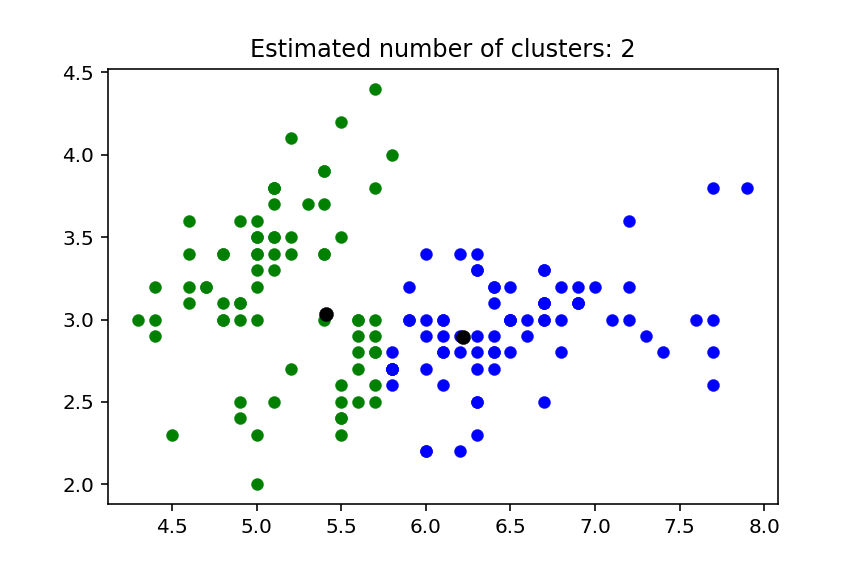

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False  True False  True False  True False
 False  True  True  True False  True False  True  True False  True  True
  True  True  True  True  True  True  True False False False  True  True
 False  True  True  True False False False  True  True False False False
 False  True False False  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[6.22  2.892]
[7.  6.4 6.9 6.5 6.3 6.6 5.9 6.  6.1 6.7 5.8 6.2 5.9 6.1 6.3 6.1 6.4 6.6

Text(0.5, 1.0, 'Estimated number of clusters: 2')

In [108]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = normalData[my_members,0], normalData[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))